## What are pretrained models and why are they useful?

Pretrained models are deep learning architectures that have been trained to perform a specific task (for instance, recognizing the breed of a dog in a picture) on a large amount of data. Such training is not easy to perform and it usually requires a lot of resources, way beyond what is available to many of the people who could have a use for a deep learning model.

When talking about pretrained models one usually refers to CNNs (architectures used for vision related tasks) trained on [Imagenet](http://image-net.org/). To give you an idea of the size of this dataset, it contains over 14 million images with 1.2 million of them assigned to one of a 1000 categories (around 1 million images also contain bounding box annotations).

So what is a pretrained model? It is a set of weights arrived at at the end of the training. A researcher, or someone implementing their model, will perform the training and share the weights for others to use. Many repositories with weights can be found on github, but probably the easiest way to get a hold of a pretrained model would be directly from within a deep learning library of your choice ([pytorch](https://pytorch.org/docs/stable/torchvision/models.html), [fastai](https://docs.fast.ai/vision.models.html), [tensorflow](https://github.com/tensorflow/models/tree/master/research/slim#Pretrained) and [keras](https://keras.io/applications/) pretrained models).

Now the above is the canonical definition of a pretrained model. This by no means is the complete story. You can also find models pretrained to perform other tasks such as [object detection](https://pjreddie.com/darknet/yolo/) or [pose estimation](https://github.com/michalfaber/keras_Realtime_Multi-Person_Pose_Estimation).

Also, quite recently researchers have started to push the boundary on what a pretrained model is. In the context of natural language processing (models that work with text) we have had word embeddings for quite a while now. Word embeddings are representations of words as a bunch of numbers where the idea is that similar words will be represented in a way that is alike in some useful way. For instance, we might hope that the representations of 'hawk', 'eagle', 'blue jay' share some similarities and are dissimilar across some other dimensions. The seminal paper for representing words by vectors was the [word2vec](https://arxiv.org/pdf/1310.4546) and a paper introducing embeddings is one of my favorite papers, originating from the 80s, the [kinship paper](http://www.cs.toronto.edu/~hinton/absps/families.pdf) by Geoffrey Hinton.

It would be a bit of a stretch to say that word embeddings are pretrained models even though the representations of words obtained through training on a large corpus of data can be very useful (and are shared in a similar way as pretrained models are). However, through the work of [Jeremy Howard](https://twitter.com/jeremyphoward) and [Sebastian Ruder](https://twitter.com/seb_ruder), truly pretrained models have arrived to the NLP world. They tend to be quite powerful and revolve around the concept of first training a language model (a model that in some sense understands text in a given language beyond just the similarities between words) and using this as a basis for more advanced tasks. There is a very nice way of training the language model on large quantities of data that does not require human annotation of the data set. This means we can train the language model on as much data as we can put our hands on, say the entire wikipedia! And then we can build a classifier and fine tune the model for a specific task (for example, sentiment analysis) where obtaining the data is more expensive. To read more about this very interesting work, please see the [paper](https://arxiv.org/abs/1801.06146) though I would recommend first taking a look at the accompanying [website](http://nlp.fast.ai/) for the big picture.

**Sidenote**: How are architectures trained from scratch to obtain the pretrained weights?
This is not easy to answer at all and the information on this is rather sparse. It takes a lot of jumping from paper to paper to piece together all the aspects of training (augmentation, train - val - test splits, weight decay, lr schedule, etc). I tried deciphering some of this for some of the experiments I have done in the past, you can take a look at such attempts [here](https://github.com/radekosmulski/machine_learning_notebooks/blob/master/cifar10_resnet20.ipynb) or [here](https://github.com/radekosmulski/machine_learning_notebooks/blob/master/cifar10_densenet.ipynb). More interesting though is the [DAWNBench competition site](https://dawn.cs.stanford.edu/benchmark/). Here various teams have attempted to train their neural networks to some level of accuracy while going for efficiency in using resources and optimizing for speed. This is generally not how the architectures have been originally trained but is a very useful source of information (as the code is also made available).

## What can a pretrained model do?

###  Using a pretrained model to classify what's in a picture

In [1]:
%matplotlib inline
from fastai import *
from fastai.vision import *

In [2]:
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/c2c91c8e767d04621020c30ed31192724b863041/imagenet1000_clsid_to_human.txt

--2018-11-22 08:52:54--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/c2c91c8e767d04621020c30ed31192724b863041/imagenet1000_clsid_to_human.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsid_to_human.txt’

imagenet1000_clsid_ 100%[===================>]  29.85K  --.-KB/s    in 0.01s   

2018-11-22 08:52:54 (2.24 MB/s) - ‘imagenet1000_clsid_to_human.txt’ saved [30564/30564]



In [10]:
# generally, don't ever run eval on files from the Internet!
classes = list(eval(open('imagenet1000_clsid_to_human.txt').read()).values())

In [19]:
data_bunch = ImageDataBunch.single_from_classes('.', classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [16]:
!wget https://upload.wikimedia.org/wikipedia/commons/8/86/BNSF_5350_20040808_Prairie_du_Chien_WI.jpg

--2018-11-22 08:58:57--  https://upload.wikimedia.org/wikipedia/commons/8/86/BNSF_5350_20040808_Prairie_du_Chien_WI.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41754 (41K) [image/jpeg]
Saving to: ‘BNSF_5350_20040808_Prairie_du_Chien_WI.jpg’

BNSF_5350_20040808_ 100%[===================>]  40.78K  --.-KB/s    in 0.04s   

2018-11-22 08:58:57 (1.08 MB/s) - ‘BNSF_5350_20040808_Prairie_du_Chien_WI.jpg’ saved [41754/41754]



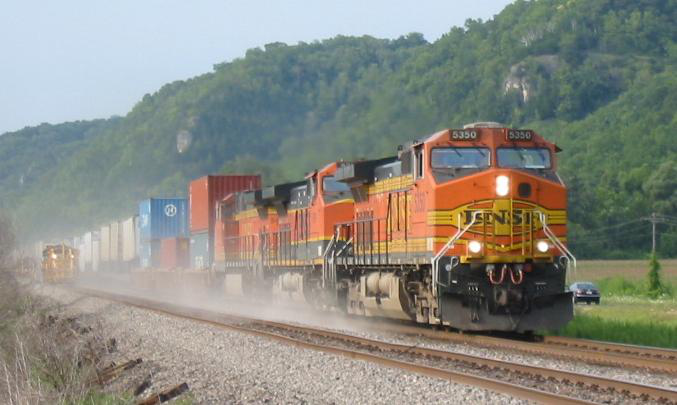

In [18]:
img = open_image('BNSF_5350_20040808_Prairie_du_Chien_WI.jpg')
img

In [20]:
learn = Learner(data_bunch, models.resnet34(True))

In [24]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

'electric locomotive'

To recap, above we went through downloading class labels (they allow us to decipher the predictions of our model), instantiating a resnet34 architecture with pretrained weights and running a prediction on an image downloaded from the Internet.

We have done zero training. 

The fact that our computers can perform this task and we can do so using high level tools is quite amazing, especially if we take a look at what the [state of the art](https://medium.com/@radekosmulski/can-we-beat-the-state-of-the-art-from-2013-with-only-0-046-of-training-examples-yes-we-can-18be24b8615f) was like as late as in 2013. The turning point came in 2012 with an entry to the ILSVRC2012 competition - you can read more about it here [here](https://www.technologyreview.com/s/530561/the-revolutionary-technique-that-quietly-changed-machine-vision-forever/).

**Sidenote**: The first post I reference above was my very first deep learning post that I have written so please take it with a grain of salt. I didn't realize Imagenet contained categories for cats and dogs (actually, it contains categories for many breeds!) but the result that I was able to retrain the classifier to perform well on this simple task of telling cats from dogs with only 3 images per class is still quite interesting. 

### Training our own classifier

We will train a yoda / chewbacca classifier. The images will come from a google search and we'll use the high level `fastai` API to make the exercise a breeze.

In [32]:
# creating folders to store our data
path = Path('data')
path.mkdir(exist_ok=True)
(path/'yoda').mkdir(exist_ok=True)
(path/'chewbacca').mkdir(exist_ok=True)

In [29]:
classes = ['yoda','chewbacca']

In [33]:
# downloading images
for c in classes:
    dest = path/c
    download_images(dest/f'urls_{c}.txt', dest, max_pics=200)

Error https://www.eknightmedia.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/s/t/star_wars_artfx_han_solo_chewbacca_statue_two_pack_05.jpg HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/s/t/star_wars_artfx_han_solo_chewbacca_statue_two_pack_05.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error http://betima.eu/3429-tm_thickbox_default/star-wars-mowiaca-maskotka-chewbacca-38-cm.jpg HTTPConnectionPool(host='betima.eu', port=80): Read timed out. (read timeout=4)


In [34]:
# removing anything that we cannot open
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

yoda


cannot identify image file '/home/radek/questions/data/yoda/00000026.jpg'
chewbacca


cannot identify image file '/home/radek/questions/data/chewbacca/00000187.jpg'
cannot identify image file '/home/radek/questions/data/chewbacca/00000142.jpg'
cannot identify image file '/home/radek/questions/data/chewbacca/00000103.jpg'


In [35]:
# creating the data_bunch
data_bunch = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=8).normalize(imagenet_stats)

There is a lot happening in the cell above. We are telling our computer to create a validation set for us that will consist of 20% of the dataset. Having a good train / val / test strategy is the most important aspect to any machine learning project - this [blog post](https://www.fast.ai/2017/11/13/validation-sets/) by [Rachel Thomas](https://twitter.com/math_rachel) is the most informative source I have come across (there are many shallower treatments that are either incomplete or theoretically incorrect so research this online with caution!)

Further to that, we are specifying data augmentation transformations used during training. By slightly modifing images before feeding them to our model (zooming in a little bit, tilting the image, etc) we artificially create more data to train on.

Last but not least, we are ensuring images will be resized to 224x224 and that this will happen in parallel using 8 workers. We are also specifying that our data should be normalized in the same fashion data normalization was done for the pretraining (zero centering channel means and unit variance scaling).

Let's take a look at the data.

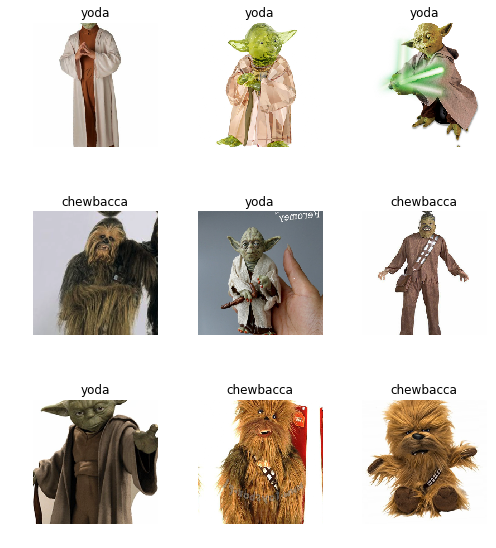

In [37]:
data_bunch.show_batch(rows=3, figsize=(7,8))

Quite a bit of variety. Let's see if our model can tackle this challenge.

In [42]:
learn = create_cnn(data_bunch, models.resnet34, metrics=error_rate)

How are we doing on telling yoda from chewbacca without training the classification head?

In [43]:
learn.validate()

[0.72308826, tensor(0.3390)]

34% error rate! This number is meaningless though - it just so happens that we have more images of chewbacca than yoda.

In [45]:
ls -l data/chewbacca/ | wc -l

198


In [46]:
ls -l data/yoda/ | wc -l

101


In [47]:
preds, _ = learn.get_preds()

And we are predicting nearly all chewbaccas!

In [52]:
learn.data.classes

['chewbacca', 'yoda']

In [55]:
(preds > 0.5)[:10]

tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0]], dtype=torch.uint8)

But that is without training - let's see if we can train our model on this little data and to what result.

#### Training

In [57]:
learn.fit_one_cycle(4)

Total time: 00:28
epoch  train_loss  valid_loss  error_rate
1      0.591364    0.099318    0.016949    (00:06)
2      0.339301    0.101888    0.050847    (00:07)
3      0.235957    0.067746    0.033898    (00:07)
4      0.177028    0.061351    0.033898    (00:07)



30 seconds later we arrive at 96.6% accuracy.

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

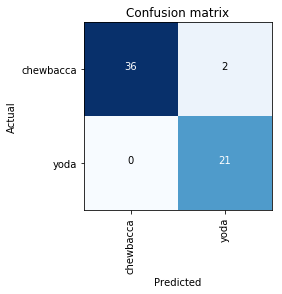

In [59]:
interp.plot_confusion_matrix()

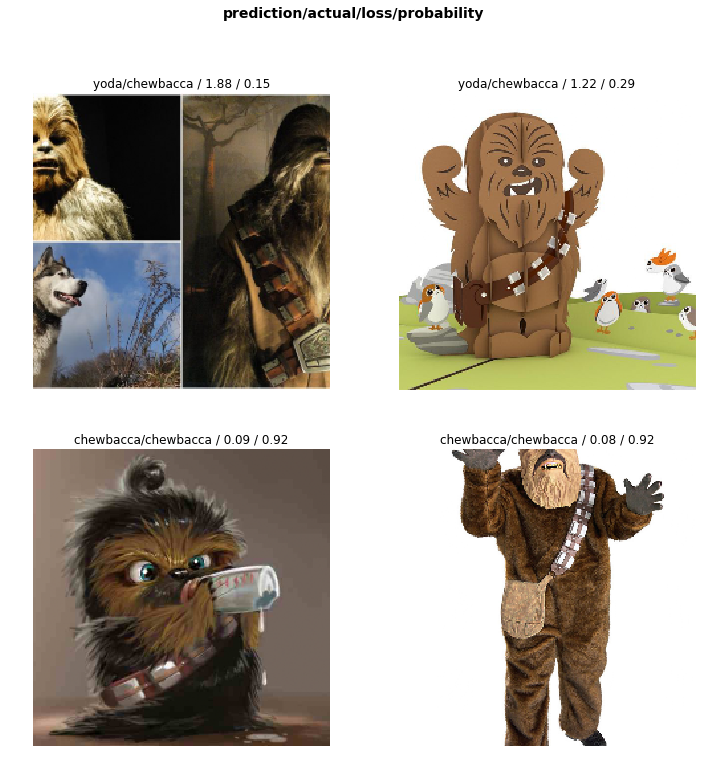

In [64]:
interp.plot_top_losses(4)

We got the two images in the first row wrong - it should be a chewbacca whereas the prediction was yoda. The second row are images where our model was least confident in it's prediction (even though it ended up being correct).

How can we be sure our model learned something useful that will generalize to unseen data? Train / val / test strategy is the most important aspect to consider here. But in our error analysis we can go much further than just that.

With just slight modifications to our model (transforming it into a fully convolutional one - it currently has an adaptive pooling layer), we could get [a heatmap of activations](https://twitter.com/radekosmulski/status/987959258091347968). They can provide insights into what areas in an image our model considers useful for making the prediction.

![](https://pbs.twimg.com/media/DbXtQzjWAAA9tYJ.jpg:large)


The heatmaps above are low resolution but even this can tell us that the model seems to be doing something reasonable. In a different scenario, say we have pictures of cats taken inside and of dogs taken in the park. Maybe the model would then learn to detect grass - chances are this is an easier task than learning to tell cats and dogs apart based on their features.

Assuming we would have a validation set created based solely on the images in train (from inside and the park) we might get a good validation score while still our model will have learned nothing!

Of course, this is a convoluted and extreme scenario. But our model can be 'cheating' in many subtle ways. Being able to identify and address the shortcomings is, in combination with the state of the art tools available to us - a true source of ML superpowers.

**Important** - the code in this notebook is based on code from a [fast.ai](https://www.fast.ai/) MOOC that will be publicly available in Jan 2019. If you are interested in learning deep learning (or machine learning in general) this is the best set of resources to use.